In [75]:
import os
import json
from itertools import chain

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from synthesized.common import ValueFactory

In [162]:
configs = json.load(open('../configs/evaluation/dataset_evaluation.json', 'r'))['instances']
configs.update(json.load(open('../configs/hyperparam/0_master.json', 'r'))['instances'])


records = []
for dataset, config in configs.items():
    if dataset in ['arx', 'housing_prices', 'james', 'vitor', 'uci_creditcard_default',
                  'sweden_motor_insurance', 'sales_pipeline', 'fraud_detection']:
        current = 'evaluator'
    else:
        current = 'template'
        
    if dataset in ['credit_scoring', 'claim_prediction', 'default_on_loan_payment',
                   'segmentation_analysis', 'sales_pipeline', 'insurance_quote_conversion',
                   'ibm_watson_marketing_customer_value_data', 'bank_marketing_dataset',
                   'bank_loan_status', 'medical_appointment_no_shows', 'diabetes_dataset',
                   'bank_churn_modelling', 'telecom_customer_churn', 
                   'epileptic_seizure_recognition_data_set', 'occupancy_detection', 
                   'atlas_higgs_boson_detection_data_set', 'james', 'arx', 
                   'uci_creditcard_default', 'vitor']:
        utility = 'bool'
    elif dataset in ['housing_prices', 'business_property_insurance_risk', 
                     'vehicle_insurance_claim_prediction', 
                     'prediction_of_electric_motor_temperature', 'air_quality_data_set',
                     'sweden_motor_insurance']:
        utility = 'continuous'
    elif dataset in ['nursery_school_application_decision', 'student_information']:
        utility = 'categorical'
    else:
        utility = 'N/A'
    
    name = '../'+config['data']
    data = pd.read_csv(open(name, 'r'))
    if 'Unnamed: 0' in data.columns:
        del data['Unnamed: 0']

    spec = [
        {k: j for k,j in chain(v.specification().items(),[('class_name', v.__class__.__name__)])} 
        for v in ValueFactory(data).get_values()
    ]
    for s in spec:
        if 'categories' in s:
            s['categories'] = '['+', '.join([str(o) for o in s['categories']])+']'
    
    for n, v in enumerate(ValueFactory(data).get_values()):
        if hasattr(v, 'day'):
            spec[n]['embedding_size'] = v.learned_input_size()
        if v.__class__.__name__ == 'NanValue':
            spec.append({'class_name': v.value.__class__.__name__,
                        'name': v.name+'_value'})
            

    # print(json.dumps(spec, cls=CustomJSONEncoder, indent=2))
    records.append((dataset, '_Rows', len(data)))
    records.append((dataset, '_utility', utility))
    records.extend([(dataset, a, b) 
                    for a, b in pd.DataFrame.from_records(spec).filter(regex='|'.join(['class_name', 'name'])).groupby('class_name').count().to_records()])
    
metadf = pd.DataFrame.from_records(records, columns=['dataset', 'value', 'name']).pivot(index='dataset',columns='value', values=['name'])

In [165]:
metadf['name']

value,CategoricalValue,ConstantValue,ContinuousValue,DateValue,NanValue,SamplingValue,_Rows,_utility
dataset,,,,,,,,
air_quality_data_set,NaN,NaN,13,1,NaN,1,9357,continuous
arx,7,NaN,2,NaN,NaN,1,30162,bool
atlas_higgs_boson_detection_data_set,2,NaN,31,NaN,NaN,NaN,100000,bool
bank_churn_modelling,7,NaN,6,NaN,NaN,1,10000,bool
bank_loan_status,11,NaN,6,NaN,6,2,110514,bool
bank_marketing_dataset,10,NaN,7,NaN,NaN,NaN,11162,bool
big_cities_health_coalition_dataset,4,NaN,5,NaN,5,6,34492,N/A
business_property_insurance_risk,9,NaN,26,NaN,20,1,105450,continuous
claim_prediction,5,NaN,3,NaN,NaN,NaN,1338,bool


In [177]:
metadf['name'].filter(regex="|".join(["housing_prices", "occupancy_detection", "prediction_of_electric_motor_temperature",
"atlas_higgs_boson_detection_data_set", "vehicle_insurance_claim_prediction",
"medical_appointment_no_shows", "james", "business_property_insurance_risk", "telecom_customer_churn"]), axis=0)
# metadf['name'].filter(regex="|".join(["arx", "housing_prices", "segmentation_analysis",
# "sales_pipeline", "sweden_motor_insurance", "vehicle_insurance_claim_prediction",
# "fraud_detection", "james", "uci_creditcard_default", "vitor"]), axis=0)

value,CategoricalValue,ConstantValue,ContinuousValue,DateValue,NanValue,SamplingValue,_Rows,_utility
dataset,,,,,,,,
atlas_higgs_boson_detection_data_set,2,NaN,31,NaN,NaN,NaN,100000,bool
business_property_insurance_risk,9,NaN,26,NaN,20,1,105450,continuous
housing_prices,4,1,1,1,NaN,3,134000,continuous
james,7,NaN,4,NaN,1,NaN,150000,bool
medical_appointment_no_shows,9,NaN,3,1,NaN,1,110527,bool
occupancy_detection,1,NaN,5,1,NaN,NaN,20560,bool
prediction_of_electric_motor_temperature,1,NaN,12,NaN,NaN,NaN,100000,continuous
telecom_customer_churn,17,NaN,3,NaN,1,1,7043,bool
vehicle_insurance_claim_prediction,11,NaN,12,NaN,NaN,3,209240,continuous


2020-02-03 17:00:44,699 :: WARNING :: posx and posy should be finite values
2020-02-03 17:00:44,745 :: WARNING :: posx and posy should be finite values
2020-02-03 17:00:44,820 :: WARNING :: posx and posy should be finite values
2020-02-03 17:00:44,849 :: WARNING :: posx and posy should be finite values
2020-02-03 17:00:45,106 :: WARNING :: posx and posy should be finite values
2020-02-03 17:00:45,134 :: WARNING :: posx and posy should be finite values


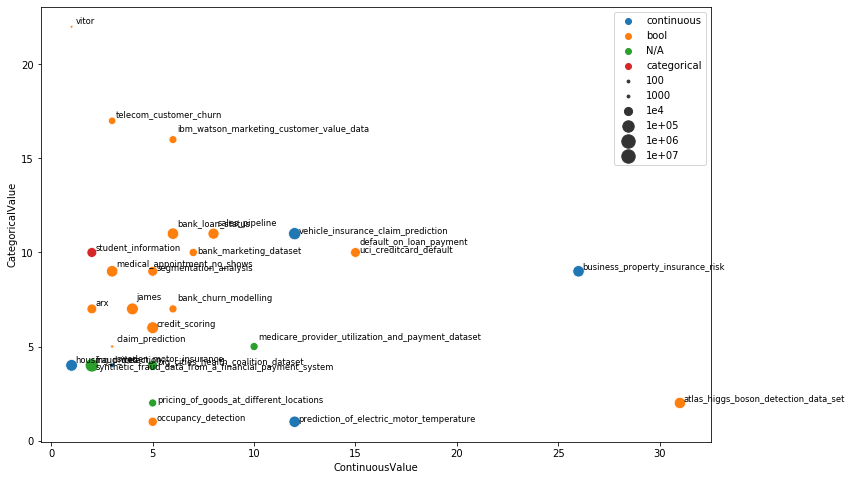

In [164]:
dfdf = metadf['name'].drop(labels=[
    'epileptic_seizure_recognition_data_set',
    'insurance_quote_conversion',
    'diabetes_dataset'
], axis=0)
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
p1=sns.scatterplot(
    data=dfdf, x="ContinuousValue", y="CategoricalValue", 
    marker="o", size_norm=LogNorm(), hue='_utility',
    size="_Rows", sizes=(8,180), axes=ax)
 
# add annotations one by one with a loop
labelled = []
for line in range(0,dfdf.shape[0]):
    loc = (dfdf.ContinuousValue[line], dfdf.CategoricalValue[line])
    np.random.seed(int(loc[0] if not np.isnan(loc[0]) else 0))
    if loc not in labelled:
        labelled.append(loc)
        p1.text(dfdf.ContinuousValue[line]+0.2, 
                 dfdf.CategoricalValue[line]+0.2+np.random.uniform(-0.3,0.3), 
                 dfdf.index[line], horizontalalignment='left', 
                 size='small', color='black', weight='normal')
    else:
        p1.text(dfdf.ContinuousValue[line]+0.2, 
                 dfdf.CategoricalValue[line]-0.2+np.random.uniform(-0.3,0.3), 
                 dfdf.index[line], horizontalalignment='left', 
                 size='small', color='black', weight='normal')
        

In [ ]:
"housing_prices", "occupancy_detection", "prediction_of_electric_motor_temperature",
"atlas_higgs_boson_detection_data_set", "vehicle_insurance_claim_predicion",
"student_information", "james", "business_property_insurance_risk"

In [154]:
df = pd.DataFrame.from_records(
    json.load(
    open('/Users/simonhkswan/PycharmProjects/synthesized/logs/hparams/hparams.json', 'r')),
    columns=['dataset', 'capacity', 'ks', 'ks_max', 'cor', 
             'cor_max', 'emd', 'emd_max', 'time', 'cont', 'cat']
)
df = df.melt(
    id_vars=['dataset', 'capacity', 'time', 'cont', 'cat'],
    value_vars=['ks', 'ks_max', 'cor', 
                'cor_max', 'emd', 'emd_max'],
    var_name='metric',
    value_name='value',
)

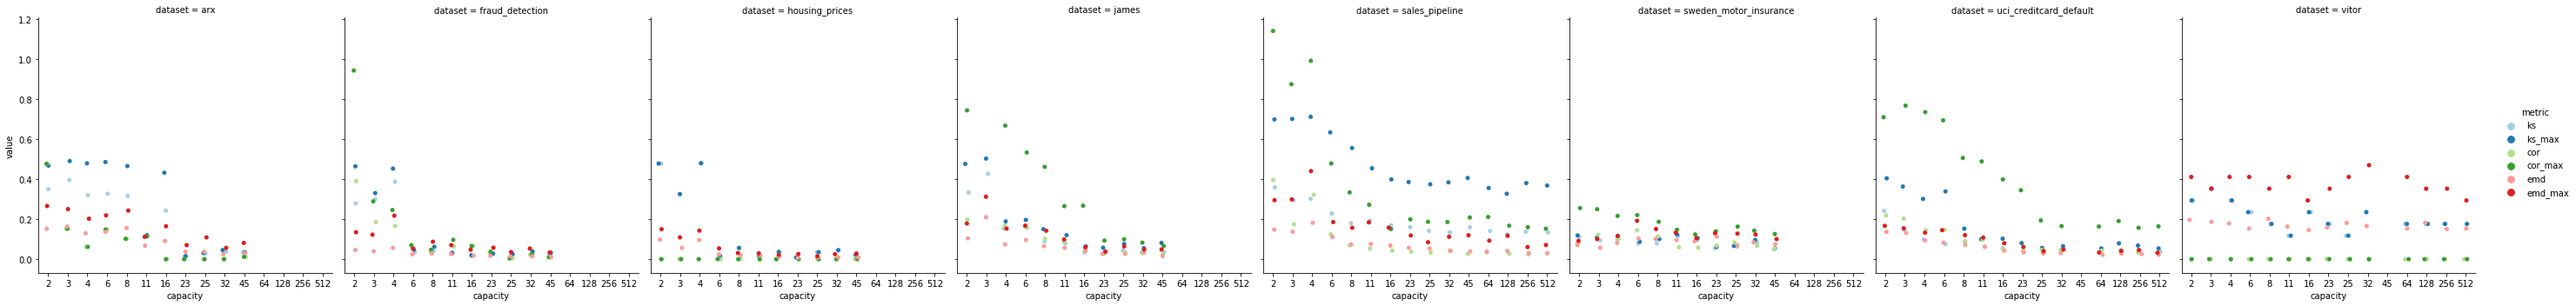

In [155]:
sns.catplot(data=df, x='capacity', y='value', hue='metric', col='dataset', palette='Paired')